#Importing needed libreries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns 
from math import e
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.impute import KNNImputer
from scipy.stats import norm, skew, kurtosis, zscore, kstest, shapiro, anderson, ttest_1samp, ttest_rel, pearsonr, spearmanr
from scipy import stats as st
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from IPython.display import display
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score

#Mount google drive & load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,Presence
1,67,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,Absence
2,57,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,Presence
3,64,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,Absence
4,74,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172.0,199.0,1,0,162.0,0,0.5,1,0,7,Absence
266,44,1,2,120.0,263.0,0,0,173.0,0,0.0,1,0,7,Absence
267,56,0,2,140.0,294.0,0,2,153.0,0,1.3,2,0,3,Absence
268,57,1,4,140.0,192.0,0,0,148.0,0,0.4,2,0,6,Absence


#EDA (Exploratory Data Analysis)

In [4]:
data.head(15)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,Presence
1,67,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,Absence
2,57,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,Presence
3,64,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,Absence
4,74,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,Absence
5,65,1,4,120.0,177.0,0,0,140.0,0,0.4,1,0,7,Absence
6,56,1,3,130.0,256.0,1,2,142.0,1,0.6,2,1,6,Presence
7,59,1,4,110.0,239.0,0,2,142.0,1,1.2,2,1,7,Presence
8,60,1,4,140.0,NaN,0,2,170.0,0,1.2,2,2,7,Presence
9,63,0,4,150.0,407.0,0,2,1154.0,0,4.0,2,3,7,Presence


**We have some nan values from the first glance.**

In [5]:
data.shape

(270, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       255 non-null    float64
 4   Cholesterol              253 non-null    float64
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   261 non-null    float64
 8   Exercise angina          270 non-null    int64  
 9   ST depression            266 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(4), int64(9), o

In [7]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,255.000000,253.000000,270.000000,270.000000,261.000000,270.000000,266.000000,270.000000,270.000000,270.000000
mean,54.433333,0.751852,3.322222,131.094118,248.758893,0.148148,1.022222,157.888889,0.329630,1.041729,1.585185,0.670370,4.696296
std,9.109067,0.964758,2.659742,18.116393,51.406345,0.355906,0.997891,100.789456,0.470952,1.141642,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,11.000000,44.000000,200.000000,564.000000,1.000000,2.000000,1380.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [8]:
missing_value = data.isnull().sum()
print(missing_value)

Age                         0
Sex                         0
Chest pain type             0
BP                         15
Cholesterol                17
FBS over 120                0
EKG results                 0
Max HR                      9
Exercise angina             0
ST depression               4
Slope of ST                 0
Number of vessels fluro     0
Thallium                    0
Heart Disease               0
dtype: int64


**These tables confirm that we have many null values for BP,Cholesterol,Max HR and ST depression. Now we calculate the data missing percent.**

In [9]:
total_values = np.product(data.shape)
total_missing = missing_value.sum()

(total_missing/total_values)*100

1.1904761904761905

**It isn't a high value. 
We check the normality for these columns for evaluate if it is possible changing missing value with mean.**


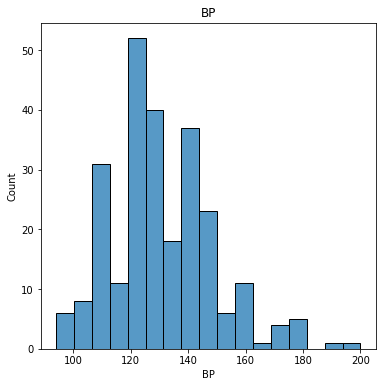

In [10]:
plt.figure(figsize = (6,6))
g = sns.histplot(data['BP'])
p = plt.title('BP')

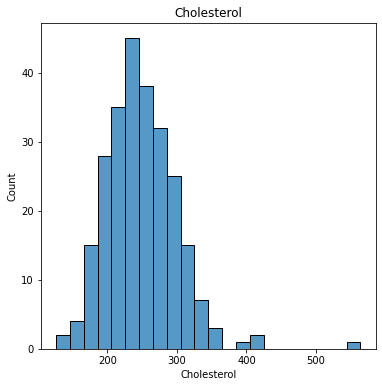

In [11]:
plt.figure(figsize = (6,6))
g = sns.histplot(data['Cholesterol'])
p = plt.title('Cholesterol')

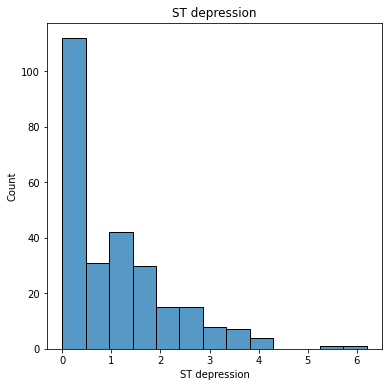

In [12]:
plt.figure(figsize = (6,6))
g = sns.histplot(data['ST depression'])
p = plt.title('ST depression')

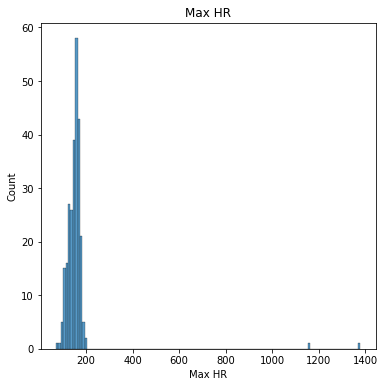

In [13]:
plt.figure(figsize = (6,6))
g = sns.histplot(data['Max HR'])
p = plt.title('Max HR')

**It seems that all variables except 'ST depression' are normal. So we replace the null values with mean in 'BP','Cholesterol', and 'Max HR' and will use the median for 'ST depression'.**

In [14]:
data['Max HR'] = data['Max HR'].fillna(data['Max HR'].mean())
data['BP'] = data['BP'].fillna(data['BP'].mean())
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].mean())
data['ST depression'] = data['ST depression'].fillna(data['ST depression'].median())

**Now we could plot some graphs for figure out if we have outliers and understand our columns distribution.**

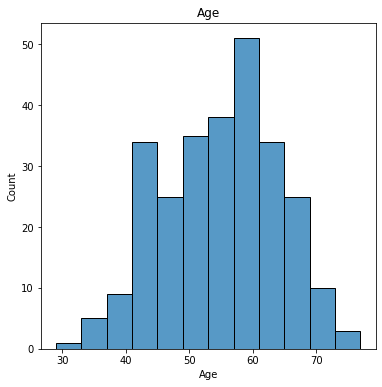

In [15]:
plt.figure(figsize = (6,6))
g = sns.histplot(data['Age'])
p = plt.title('Age')

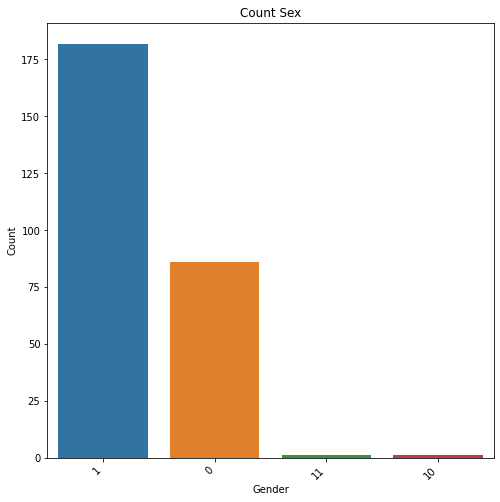

In [16]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Sex', data = data, order = data['Sex'].value_counts().index)
p = plt.title('Count Sex')
p = plt.xlabel('Gender')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

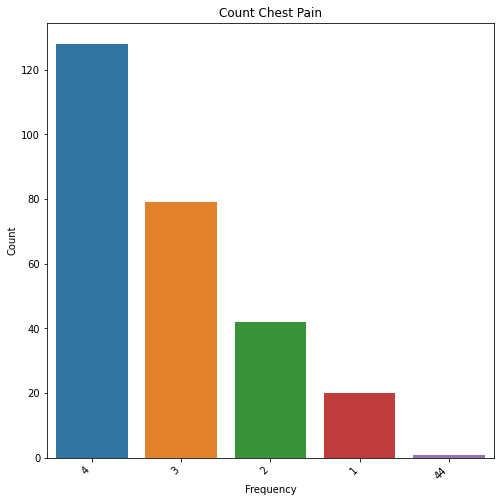

In [17]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Chest pain type', data = data, order = data['Chest pain type'].value_counts().index)
p = plt.title('Count Chest Pain')
p = plt.xlabel('Frequency')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

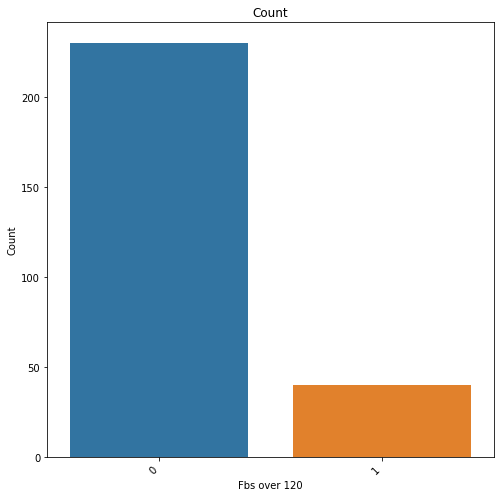

In [18]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'FBS over 120', data = data, order = data['FBS over 120'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Fbs over 120')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

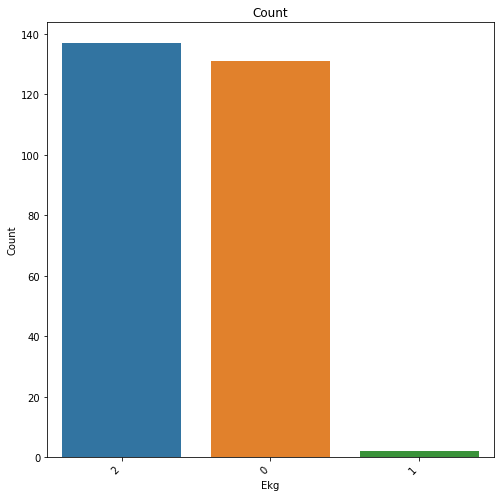

In [19]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'EKG results', data = data, order = data['EKG results'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Ekg')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

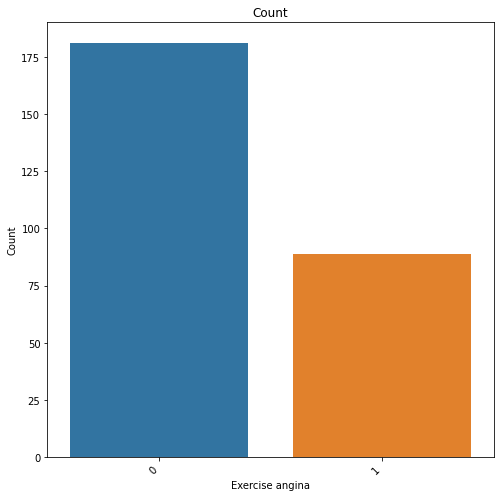

In [20]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Exercise angina', data = data, order = data['Exercise angina'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Exercise angina')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

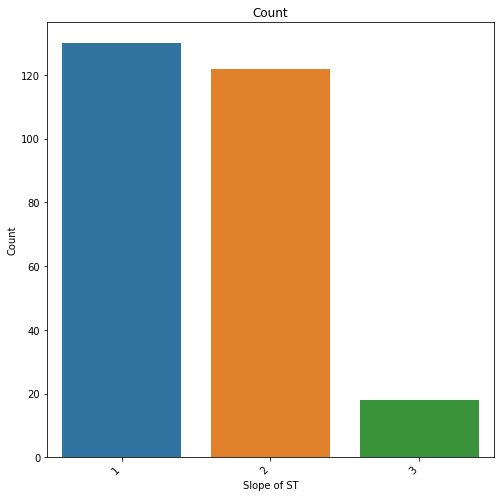

In [21]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Slope of ST', data = data, order = data['Slope of ST'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Slope of ST')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

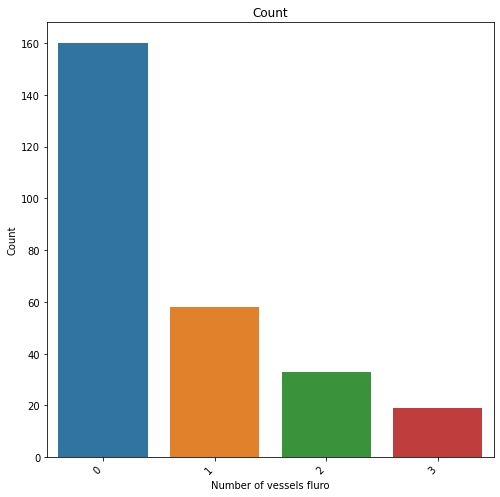

In [22]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Number of vessels fluro', data = data, order = data['Number of vessels fluro'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Number of vessels fluro')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

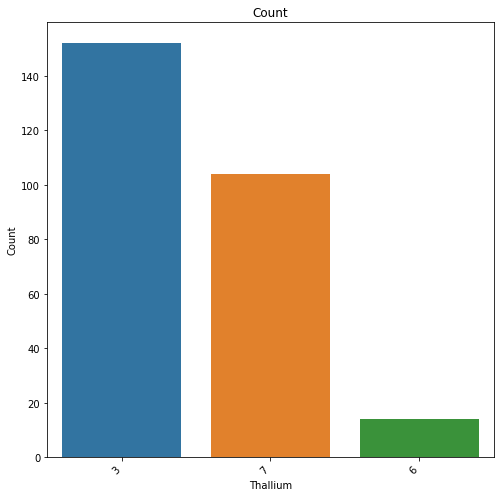

In [23]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Thallium', data = data, order = data['Thallium'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Thallium')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

**We notice that for many columns there are some strange values, for examples 10 and 11 for 'Sex' or 44 in 'Chest pain type.**

**Now let's try to manipulate these values in appropriate way.
In additional we are going to show boxplots for evaluate whether there are outliers.**

**In 'Sex' we have two values equal to 10 and 11, but 'Sex' is a categorical column so we need to replace it with:**
* 10 -> 0
* 11 -> 1

**For our analysis we consider 0 to be a 'Female' and 1 to be a 'Male'.**

In [24]:
data['Sex'] = data['Sex'].replace([10],0)
data['Sex'] = data['Sex'].replace([11],1)

**In 'Chest pain type' we have 44 that will be 4. We consider 44 an error input.**

In [25]:
data['Chest pain type'] = data['Chest pain type'].replace([44],4)

In [26]:
data['Heart Disease'] = data['Heart Disease'].replace(['Presence'],1)
data['Heart Disease'] = data['Heart Disease'].replace(['Absence'],0)

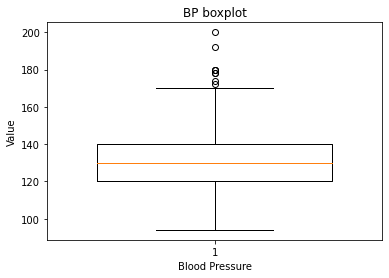

In [27]:
fig, ax = plt.subplots()
ax.boxplot(data['BP'], widths=0.7)

ax.set_xlabel('Blood Pressure')
ax.set_ylabel('Value')
ax.set_title('BP boxplot')

plt.show()

**We can notice that we have some outliers over ~ 170. We don't manipulate them because a blood pressure over 160/170 sometimes is 'normal' to find it.**

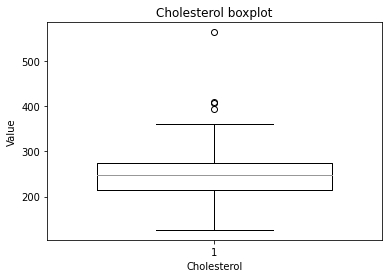

In [28]:
fig, ax = plt.subplots()
ax.boxplot(data['Cholesterol'], widths=0.7)

ax.set_xlabel('Cholesterol')
ax.set_ylabel('Value')
ax.set_title('Cholesterol boxplot')

plt.show()

**Here we have an high value that we can change.
Before doing this, we need to show how many values are major than a specific target.**

In [29]:
outliers_cholesterol = data[data['Cholesterol'] > 350]
print(outliers_cholesterol)

     Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
1     67    0                3  115.0        564.0             0            2   
9     63    0                4  150.0        407.0             0            2   
71    57    0                4  120.0        354.0             0            0   
123   65    0                3  160.0        360.0             0            2   
181   56    0                4  134.0        409.0             0            2   
188   62    0                4  140.0        394.0             0            2   
257   55    1                4  132.0        353.0             0            0   

          Max HR  Exercise angina  ST depression  Slope of ST  \
1     160.000000                0            1.6            2   
9    1154.000000                0            4.0            2   
71    163.000000                1            0.6            1   
123   151.000000                0            0.8            1   
181   150.000000          

**This table confirm we have many values high than 350 but only one is abnormal (564). We replace it with the mean.**

In [30]:
cholesterol_mean = data['Cholesterol'].mean()
data['Cholesterol'] = data['Cholesterol'].replace([564.0],cholesterol_mean)

In [31]:
ekg_total = data['EKG results'].value_counts()
print(ekg_total)

2    137
0    131
1      2
Name: EKG results, dtype: int64


**Value 1 for 'EKG results' has a very low frequency. We convert it to value 0.**

In [32]:
data['EKG results'] = data['EKG results'].replace([1],0)

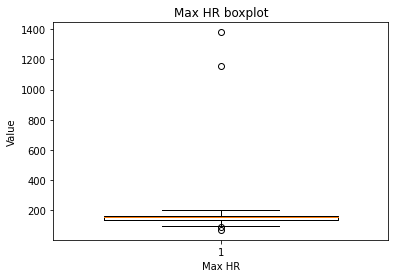

In [33]:
fig, ax = plt.subplots()
ax.boxplot(data['Max HR'], widths=0.7)

ax.set_xlabel('Max HR')
ax.set_ylabel('Value')
ax.set_title('Max HR boxplot')

plt.show()

In [34]:
outliers_Max_HR = data[data['Max HR'] > 400]
print(outliers_Max_HR)

     Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
9     63    0                4  150.0        407.0             0            2   
109   45    0                2  112.0        160.0             0            0   

     Max HR  Exercise angina  ST depression  Slope of ST  \
9    1154.0                0            4.0            2   
109  1380.0                0            0.0            2   

     Number of vessels fluro  Thallium  Heart Disease  
9                          3         7              1  
109                        0         3              0  


**As we can see we have 2 outliers. 
Also them could replace with mean, that because 'Max HR' seems has a normal distribution.**

In [35]:
data['Max HR'] = data['Max HR'].replace([1154.0],data['Max HR'].mean())
data['Max HR'] = data['Max HR'].replace([1380.0],data['Max HR'].mean())

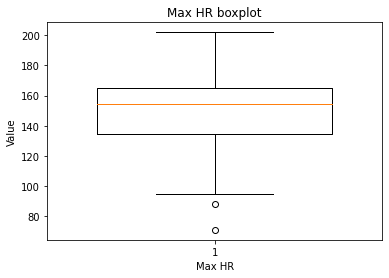

In [36]:
fig, ax = plt.subplots()
ax.boxplot(data['Max HR'], widths=0.7)

ax.set_xlabel('Max HR')
ax.set_ylabel('Value')
ax.set_title('Max HR boxplot')

plt.show()

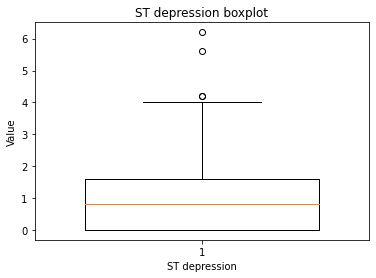

In [37]:
fig, ax = plt.subplots()
ax.boxplot(data['ST depression'], widths=0.7)

ax.set_xlabel('ST depression')
ax.set_ylabel('Value')
ax.set_title('ST depression boxplot')

plt.show()

In [38]:
st_depression_mean = data['ST depression'].mean()
data['ST depression'] = data['ST depression'].replace([5.6],st_depression_mean)
data['ST depression'] = data['ST depression'].replace([6.2],st_depression_mean)
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.094118,247.591334,0.148148,1.014815,149.659587,0.329630,1.002134,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.604045,45.878183,0.355906,1.001747,22.579862,0.470952,1.052191,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,214.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,248.379447,0.000000,2.000000,154.599794,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,273.750000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


**While for 'Slope of ST', 'Number of vessels fluro' and 'Thallium' we don't need change anything. These columns don't have outliers apparently.**

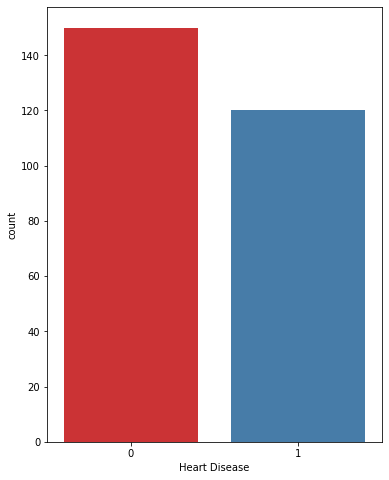

In [39]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Heart Disease", data=data, palette="Set1")
plt.show()

**The number of patients with 'Absence' is greater than those with 'Presence', as can be seen. 
Continuing the analysis, we will try to answer what correlations there are in 'Presence' and 'Absence'.**

In [40]:
categorical = data.select_dtypes(include=['category','int']).columns
continuous = data.select_dtypes(include=['float']).columns
categorical = [x for x in categorical if x != 'Age']
continuous = [*continuous, 'Age']

print(categorical)
print(continuous)

['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
['BP', 'Cholesterol', 'Max HR', 'ST depression', 'Age']


In [41]:
for col in categorical:
    if col in ['Heart Disease', 'Age']: continue
    crosstab = pd.crosstab(data[col], data['Heart Disease'], normalize=True).mul(100).round(1)
    display(crosstab.astype(str) + '%')
    print('\n')

Heart Disease,0,1
Sex,,
0,24.8%,7.4%
1,30.7%,37.0%


Heart Disease,0,1
Chest pain type,,
1,5.6%,1.9%
2,13.0%,2.6%
3,23.0%,6.3%
4,14.1%,33.7%


Heart Disease,0,1
FBS over 120,,
0,47.0%,38.1%
1,8.5%,6.3%


Heart Disease,0,1
EKG results,,
0,31.9%,17.4%
2,23.7%,27.0%


Heart Disease,0,1
Exercise angina,,
0,47.0%,20.0%
1,8.5%,24.4%


Heart Disease,0,1
Slope of ST,,
1,36.3%,11.9%
2,16.3%,28.9%
3,3.0%,3.7%


Heart Disease,0,1
Number of vessels fluro,,
0,44.4%,14.8%
1,7.4%,14.1%
2,2.6%,9.6%
3,1.1%,5.9%


Heart Disease,0,1
Thallium,,
3,44.1%,12.2%
6,2.2%,3.0%
7,9.3%,29.3%


**Above here we can see already many relations between categorical variables and 'Heart Disease' like:**

* High value of 'Chest pain type' seems correlated with the presence of heart disease.

* Heart disease presence are most in male than female.

* High value of 'Thallium' -> Presence of 'Heart Disease'
* Low value of 'Thallium' -> Absence of 'Heart Disease'


**Of course these are just hypotheses and valuations after the first look. Now we should valid or reject all these with statistic tools.**

# Check normal distribution


**Checking normal distribution is an important phase for a data analyist becuse various statistical methods make assumptions about normality, i.e. Regression, t-test or ANOVA test.**

**Below we study the normality of continuous columns.**

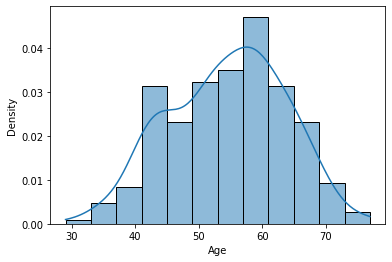

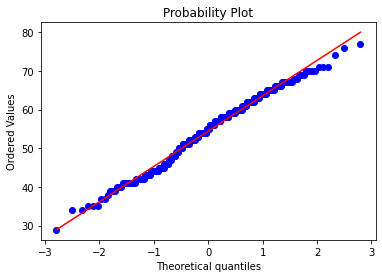

In [42]:
sns.histplot(data["Age"], kde=True, stat="density")
fig = plt.figure()
res = st.probplot(data['Age'], plot=plt)

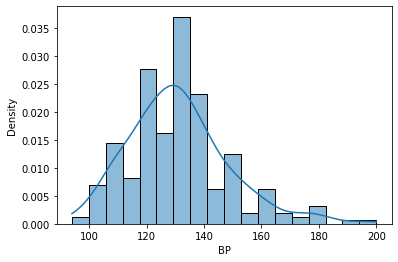

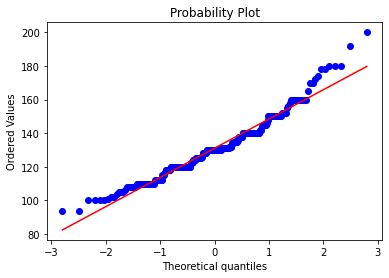

In [43]:
sns.histplot(data["BP"], kde=True, stat="density")
fig = plt.figure()
res = st.probplot(data['BP'], plot=plt)

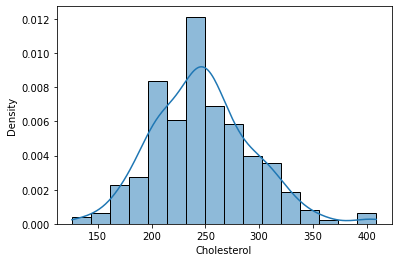

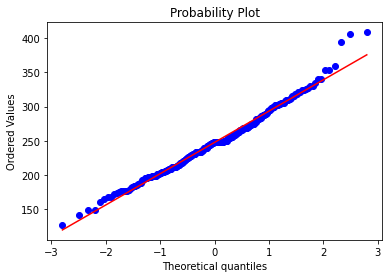

In [44]:
sns.histplot(data["Cholesterol"], kde=True, stat="density")
fig = plt.figure()
res = st.probplot(data['Cholesterol'], plot=plt)

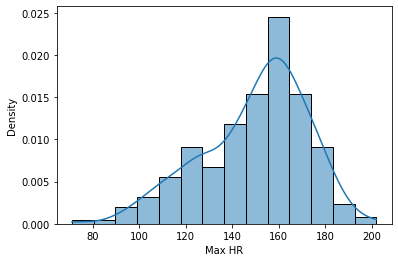

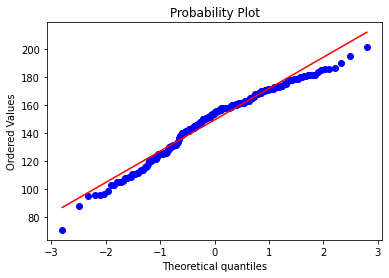

In [45]:
sns.histplot(data["Max HR"], kde=True, stat="density")
fig = plt.figure()
res = st.probplot(data['Max HR'], plot=plt)

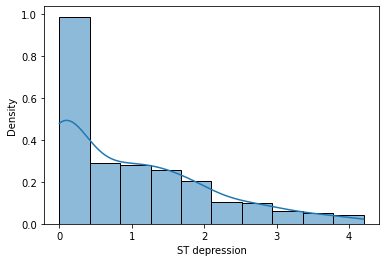

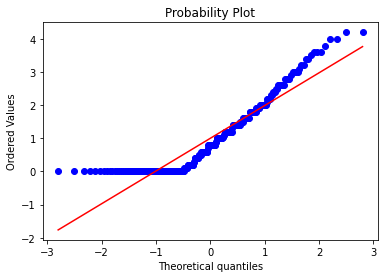

In [46]:
sns.histplot(data["ST depression"], kde=True, stat="density")
fig = plt.figure()
res = st.probplot(data['ST depression'], plot=plt)



**We plotted two types of graphs, the histogram with the density line and the Q-Q plot graph. Only the "ST depression" doesn't have a normal distribution, but before concluding this we need to use other tools for normality distribution.**

In [47]:
def boxplot_by_group(df, categorical, continuous):
    for g_col in categorical:
        groups = df.groupby(g_col)
        fig, axs = plt.subplots(len(groups), len(continuous), figsize=(16, 8))
        i = 0
        for k, g in groups:
            for j, col in enumerate(continuous):
                ax = axs[i, j]
                ax.set_title(f"Distribution of {col} \n for group {k}")
                g.boxplot(column=col, ax=ax)
            i += 1
        fig.tight_layout(pad=4)
        fig.suptitle(f'Distributions grouped by {g_col}', fontsize=14)

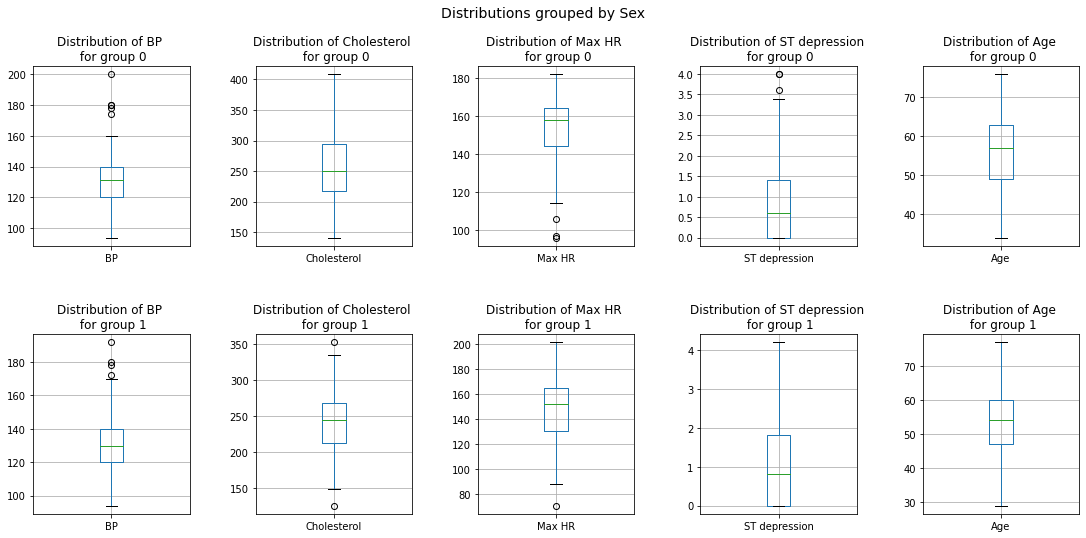

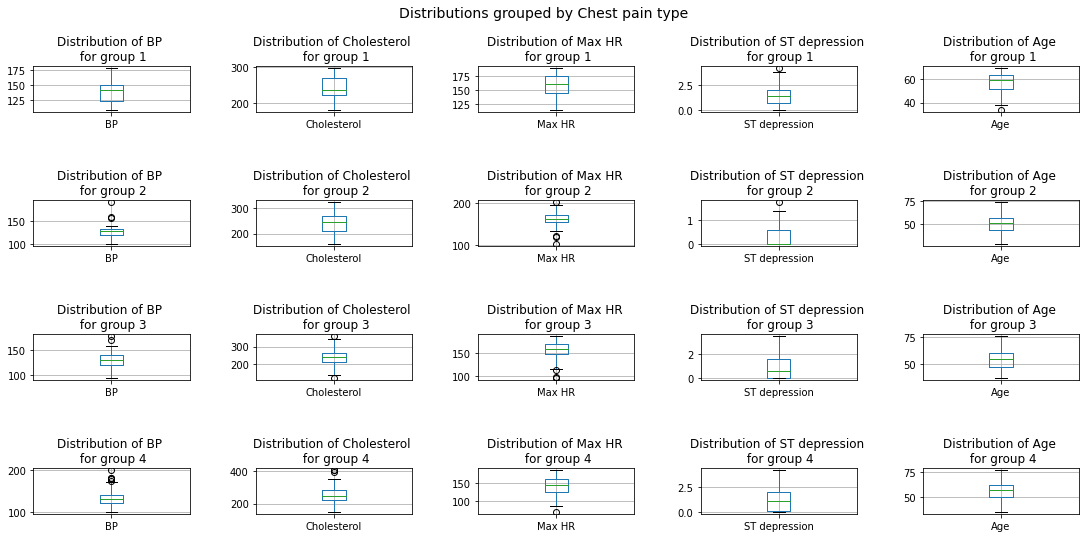

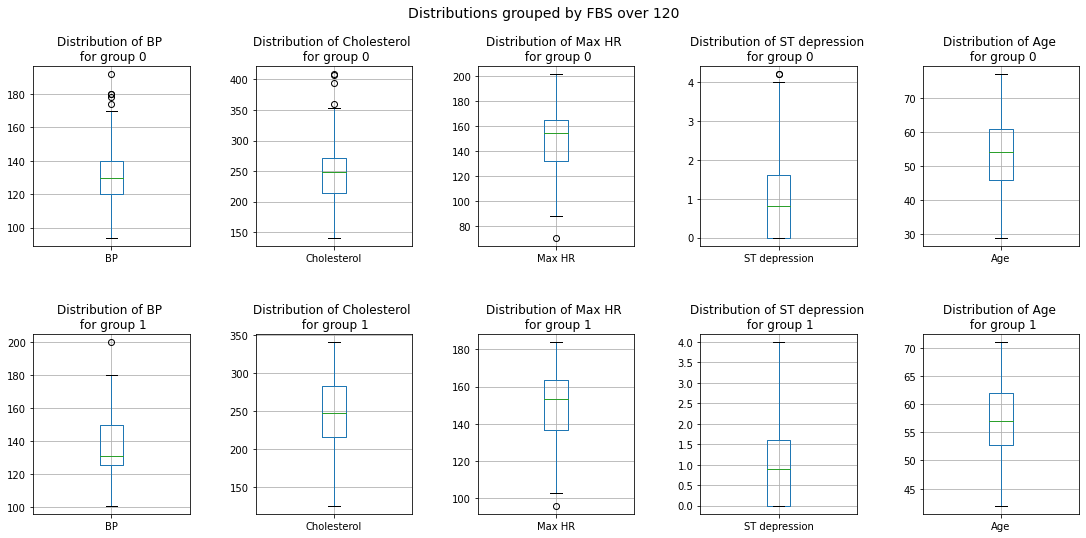

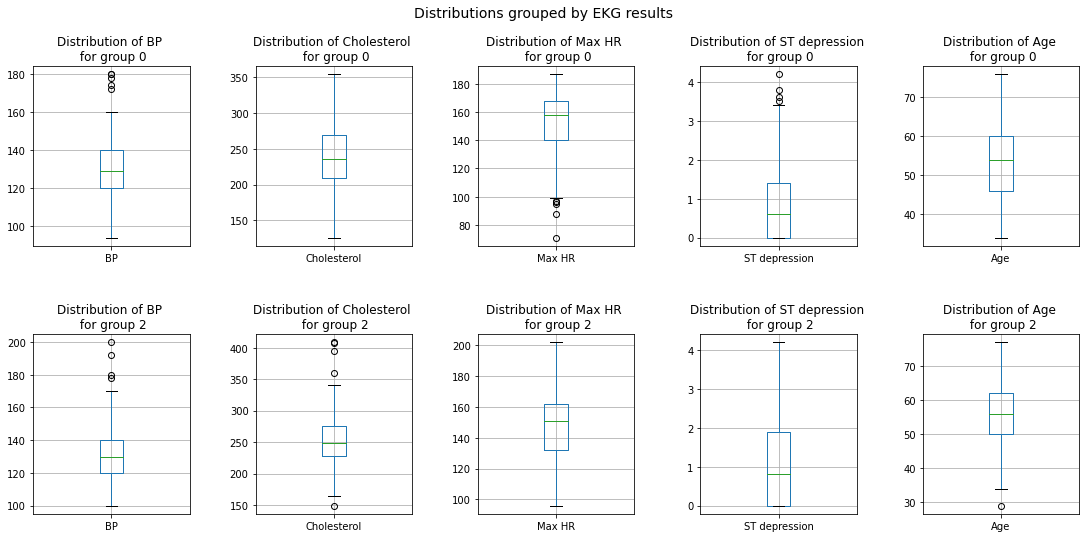

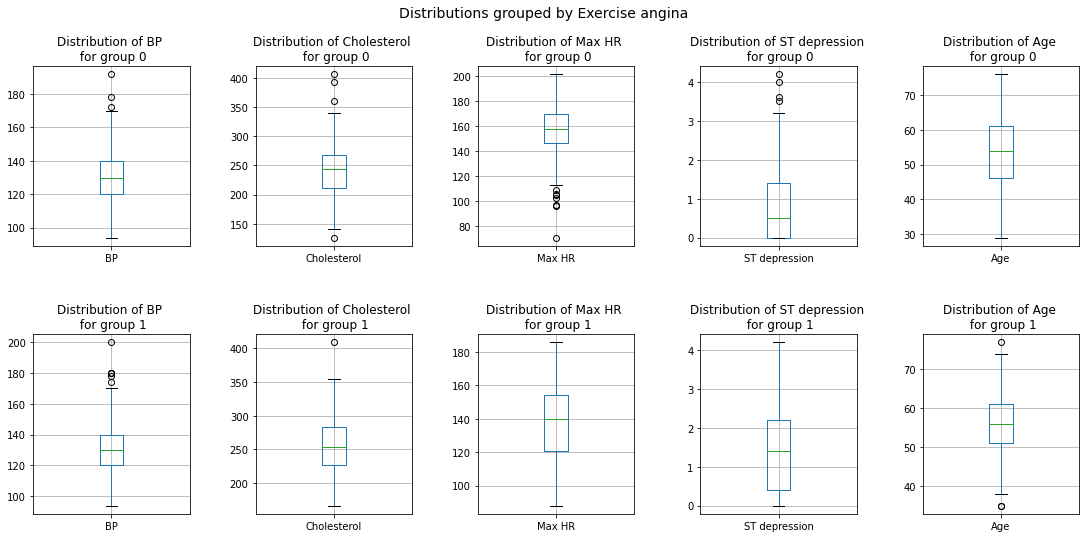

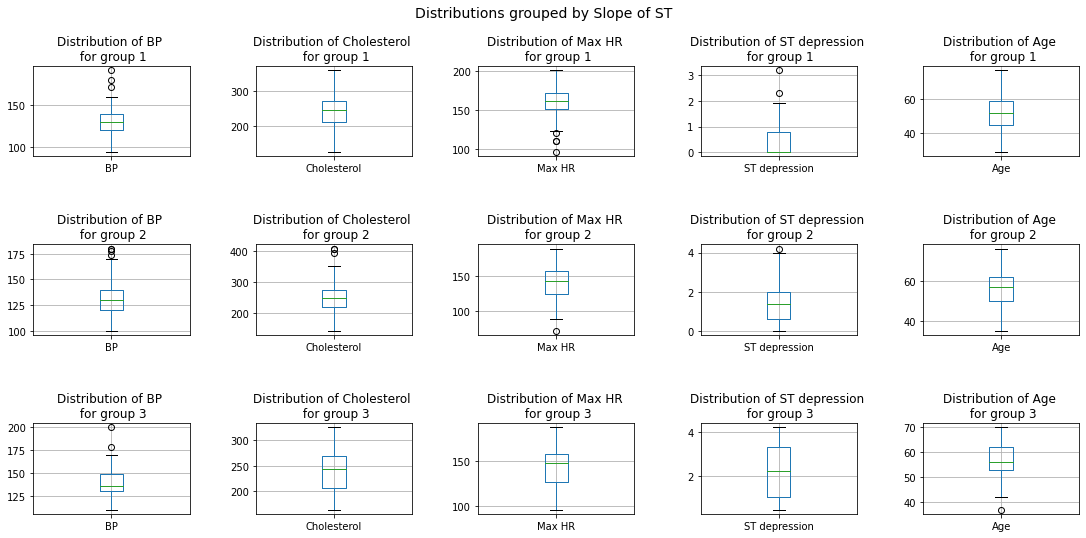

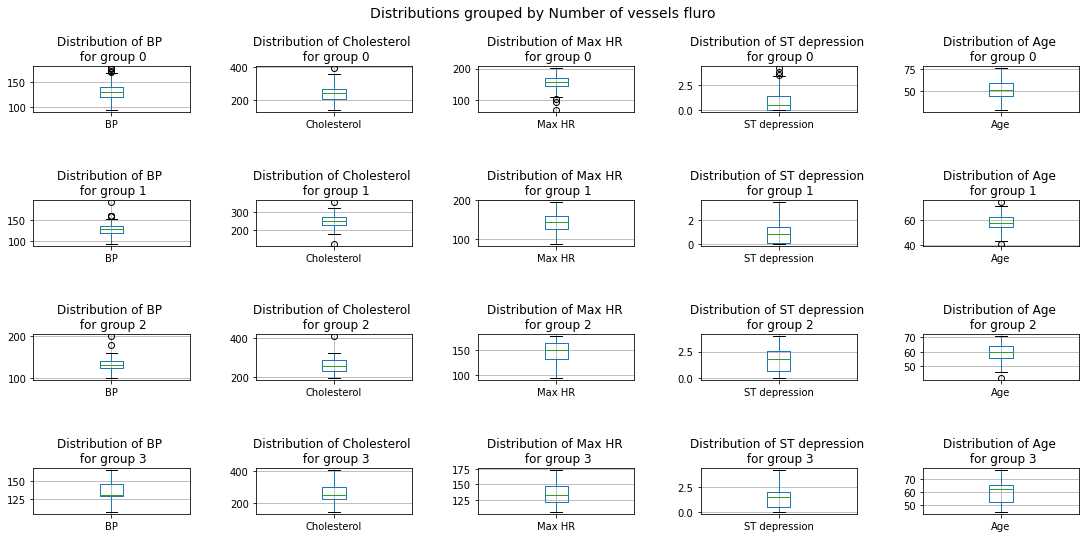

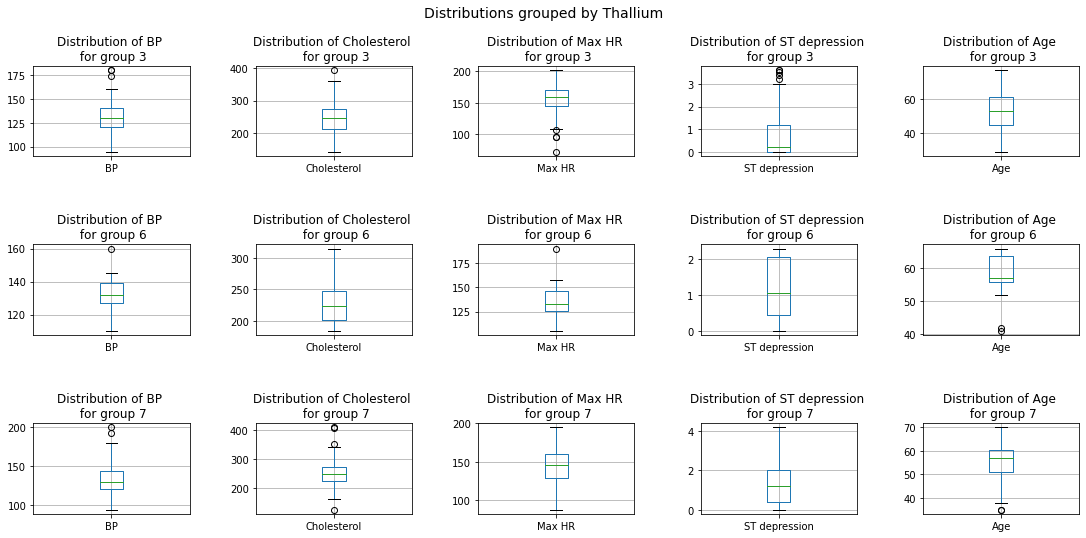

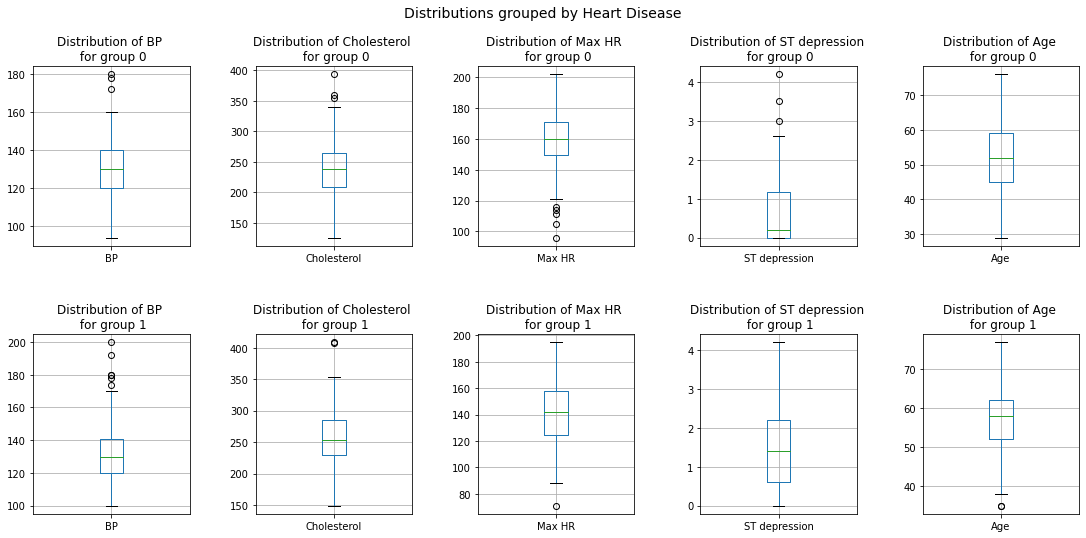

In [48]:
boxplot_by_group(data,categorical,continuous)

In [49]:
age_skew = skew(data['Age'])
age_kur = kurtosis(data['Age'])
print(f'Age skewness: {age_skew:.2f}')
print(f'Age kurtosis: {age_kur:.2f}')
print('')

bp_skew = skew(data['BP'])
bp_kur = kurtosis(data['BP'])
print(f'BP skewness: {bp_skew:.2f}')
print(f'BP kurtosis: {bp_kur:.2f}')
print('')

cholesterol_skew = skew(data['Cholesterol'])
cholesterol_kur = kurtosis(data['Cholesterol'])
print(f'Cholesterol skewness: {cholesterol_skew:.2f}')
print(f'Cholesterol kurtosis: {cholesterol_kur:.2f}')
print('')

max_hr_skew = skew(data['Max HR'])
max_hr_kur = kurtosis(data['Max HR'])
print(f'Max HR skewness: {max_hr_skew:.2f}')
print(f'Max HR kurtosis: {max_hr_kur:.2f}')
print('')

st_depression_skew = skew(data['ST depression'])
st_depression_kur = kurtosis(data['ST depression'])
print(f'ST depression skewness: {st_depression_skew:.2f}')
print(f'ST depression kurtosis: {st_depression_kur:.2f}')
  

Age skewness: -0.16
Age kurtosis: -0.56

BP skewness: 0.77
BP kurtosis: 1.11

Cholesterol skewness: 0.44
Cholesterol kurtosis: 0.65

Max HR skewness: -0.63
Max HR kurtosis: 0.02

ST depression skewness: 0.97
ST depression kurtosis: 0.19


In [50]:
age_std_errors = np.std(data['Age'])/np.sqrt(len(data))
bp_std_errors = np.std(data['BP'])/np.sqrt(len(data))
cholesterol_std_errors = np.std(data['Cholesterol'])/np.sqrt(len(data))
max_hr_std_errors = np.std(data['Max HR'])/np.sqrt(len(data))
st_depression_std_errors = np.std(data['ST depression'])/np.sqrt(len(data))

age_ske_z_score = age_skew/age_std_errors
age_kur_z_score = age_kur/age_std_errors
print(f'Age z-value with kurtosis: {age_kur_z_score:.2f}')
print(f'Age z-value with skewness: {age_ske_z_score:.2f}')
print('')

bp_ske_z_score = bp_skew/bp_std_errors
bp_kur_z_score = bp_kur/bp_std_errors
print(f'BP z-value with kurtosis: {bp_kur_z_score:.2f}')
print(f'BP z-value with skewness: {bp_ske_z_score:.2f}')
print('')

cholesterol_ske_z_score = cholesterol_skew/cholesterol_std_errors
cholesterol_kur_z_score = cholesterol_kur/cholesterol_std_errors
print(f'Cholesterol z-value with kurtosis: {cholesterol_kur_z_score:.2f}')
print(f'Cholesterol z-value with skewness: {cholesterol_ske_z_score:.2f}')
print('')

max_hr_ske_z_score = max_hr_skew/max_hr_std_errors
max_hr_kur_z_score = max_hr_kur/max_hr_std_errors
print(f'Max HR z-value with kurtosis: {max_hr_kur_z_score:.2f}')
print(f'Max HR z-value with skewness: {max_hr_ske_z_score:.2f}')
print('')

st_depression_ske_z_score = st_depression_skew/st_depression_std_errors
st_depression_kur_z_score = st_depression_kur/st_depression_std_errors
print(f'St_depression z-value with kurtosis: {st_depression_kur_z_score:.2f}')
print(f'St_depression z-value with skewness: {st_depression_ske_z_score:.2f}')
print('')


Age z-value with kurtosis: -1.01
Age z-value with skewness: -0.29

BP z-value with kurtosis: 1.04
BP z-value with skewness: 0.72

Cholesterol z-value with kurtosis: 0.23
Cholesterol z-value with skewness: 0.16

Max HR z-value with kurtosis: 0.02
Max HR z-value with skewness: -0.46

St_depression z-value with kurtosis: 2.97
St_depression z-value with skewness: 15.11



**Above here we calculated z-value, skewness and kurtosis. We should have (-3.29,3.29), (-1,1) and (-2,2) respectively for z-score,skewness and kurtosis to consider our data normally distributed.
Tell that and show our results we can say that 'FBS over 120' doesn't is normally distributed. This conclusion is strengthened with Q-Q plot.**

#Parametric test, effect size and power

**Are the means of 'Max HR' groups equal to or greater than the normal values of the population?**

**To answer this question we need to divide our dataset by age because the value of 'Max HR' is different with different ages. Did that we import the normal value of 'Max HR' from the internet for each group and we are going to compare this value with the mean of every group.**

**We can summerize all this with an hypotesis.**

**H0: There is no difference**

**H1: There is difference**

In [51]:
(
    data
    .groupby(["Age"])
    [["Max HR"]]
    .mean()
)

,Max HR
Age,
29,202.000000
34,165.944444
35,156.000000
37,178.500000
38,182.000000
39,167.000000
40,157.666667
41,162.777778
42,155.736111


In [52]:
age_29_39 = data.loc[data['Age'].between(29,39)]
age_40_44 = data.loc[data['Age'].between(40,44)]
age_45_49 = data.loc[data['Age'].between(45,49)]
age_50_54 = data.loc[data['Age'].between(50,54)]
age_55_59 = data.loc[data['Age'].between(55,59)]
age_60_64 = data.loc[data['Age'].between(60,64)]
age_65_69 = data.loc[data['Age'].between(65,69)]
age_70_77 = data.loc[data['Age'].between(70,77)]

mean_age_29_39=age_29_39['Max HR'].mean()
mean_age_40_44=age_40_44['Max HR'].mean()
mean_age_45_49=age_45_49['Max HR'].mean()
mean_age_50_54=age_50_54['Max HR'].mean()
mean_age_55_59=age_55_59['Max HR'].mean()
mean_age_60_64=age_60_64['Max HR'].mean()
mean_age_65_69=age_65_69['Max HR'].mean()
mean_age_70_77=age_70_77['Max HR'].mean()

print(mean_age_29_39)
print(mean_age_40_44)
print(mean_age_45_49)
print(mean_age_50_54)
print(mean_age_55_59)
print(mean_age_60_64)
print(mean_age_65_69)
print(mean_age_70_77)

170.15740740740742
161.15615615615616
156.23628257887515
151.71488469601678
145.66255144032922
142.58212560386474
140.92460317460316
130.5


**After calculating the mean we could use one sample t-test.**

In [53]:
print(st.ttest_1samp(age_29_39['Max HR'],158))
print(st.ttest_1samp(age_40_44['Max HR'],151))
print(st.ttest_1samp(age_45_49['Max HR'],147))
print(st.ttest_1samp(age_50_54['Max HR'],143))
print(st.ttest_1samp(age_55_59['Max HR'],139))
print(st.ttest_1samp(age_60_64['Max HR'],134))
print(st.ttest_1samp(age_65_69['Max HR'],130))
print(st.ttest_1samp(age_70_77['Max HR'],124))

TtestResult(statistic=2.0408063595499986, pvalue=0.06601241205061376, df=11)
TtestResult(statistic=3.2999913164873305, pvalue=0.002186573233912615, df=36)
TtestResult(statistic=2.899823513943224, pvalue=0.007049409044774095, df=29)
TtestResult(statistic=2.820951049088155, pvalue=0.006763902152222082, df=52)
TtestResult(statistic=2.254332890329333, pvalue=0.028333055613791933, df=53)
TtestResult(statistic=2.605733711408557, pvalue=0.012385192566390445, df=45)
TtestResult(statistic=2.582167222144599, pvalue=0.01556304930343665, df=27)
TtestResult(statistic=1.0723840547420327, pvalue=0.3114593217777126, df=9)


**We found:**

* **For 'Age' between 29-29 and 70-77 we don't reject H0**
* **For 'Age' between 40-44 ; 45-49 ; 50-54 ; 55-59 ; 60-64 ; 65-69 reject H0, so accept H1**

In [54]:
sample_size = len(data)
sample_data = data.sample(n=sample_size, random_state=1)
alpha = 0.05

targets = ['Max HR', 'Cholesterol', 'BP']
groups = ['Heart Disease', 'FBS over 120', 'Exercise angina', 'Sex']

In [55]:
def effect_size(groups, target_column):
    g1 = groups.get_group(0)
    g2 = groups.get_group(1)
    mu1 = g1[target_column].mean()
    mu2 = g2[target_column].mean()
    s1 = g1[target_column].std()
    s2 = g2[target_column].std()
    n1 = len(g1)
    n2 = len(g2)
    # Calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    # Calculate the Cohen's d effect size
    d = (mu1 - mu2) / s
    # Print results
    return round(d, 2)

In [56]:
def group_kde(df, target_column, group_column, ax=None, title=None):
    groups = df.groupby(group_column)
    axe = ax
    for k, g in groups:
        # Plot pandas KDE
        axe = g[target_column].plot.density(alpha=0.5, ax=axe)

    axe.legend(labels=groups.groups.keys(), frameon=False)
    if title is None:
        title = f'{target_column} distribution by {group_column}'
    axe.set_title(title, fontsize=14, pad=15)

    if ax is None:
        plt.show()

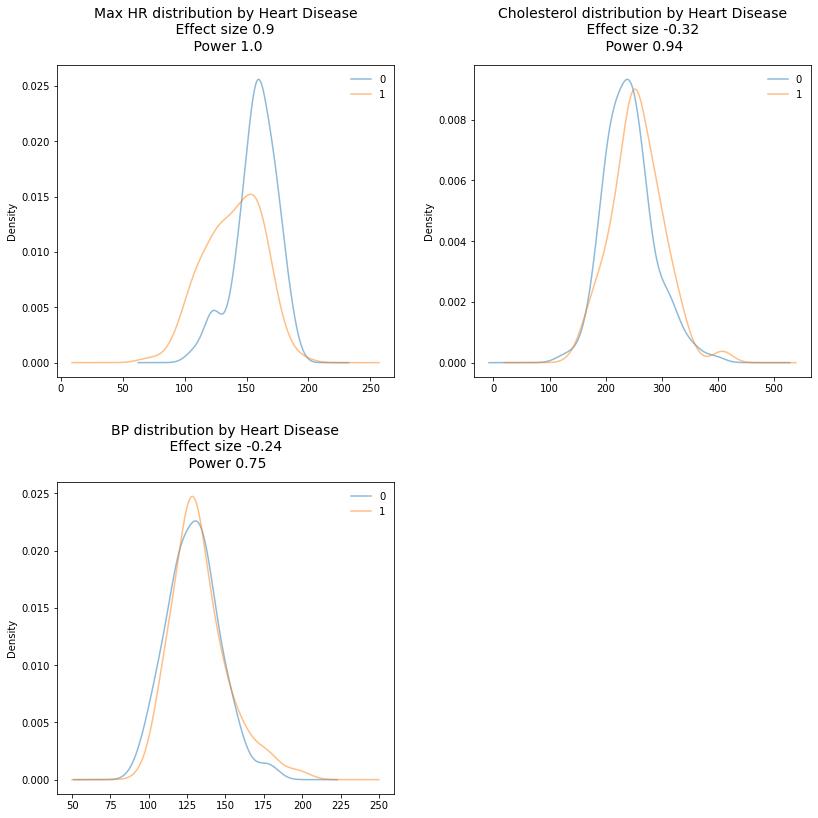

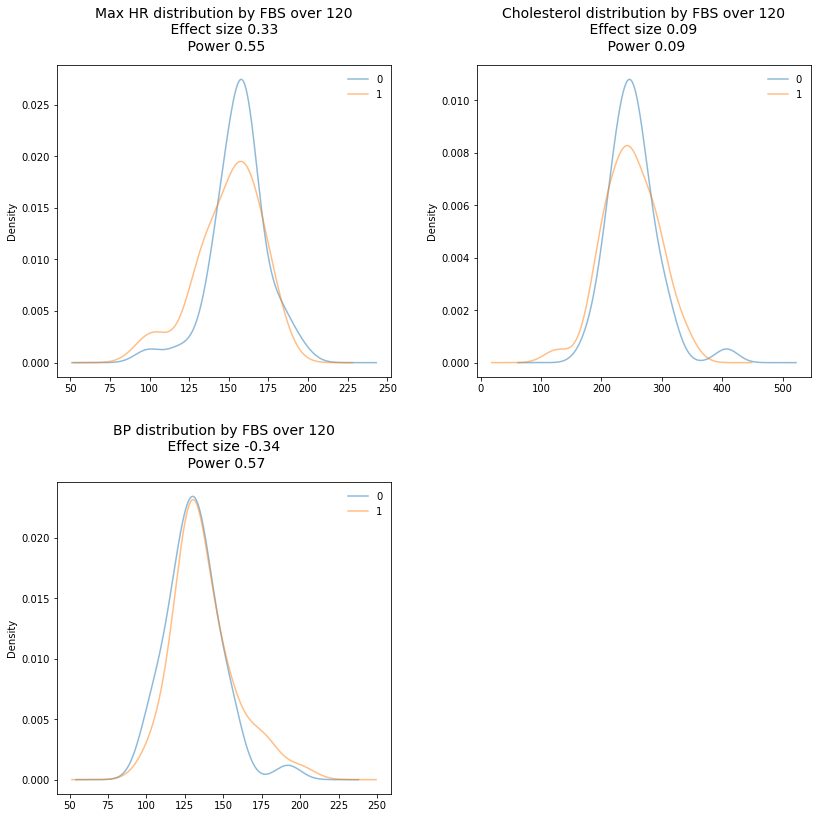

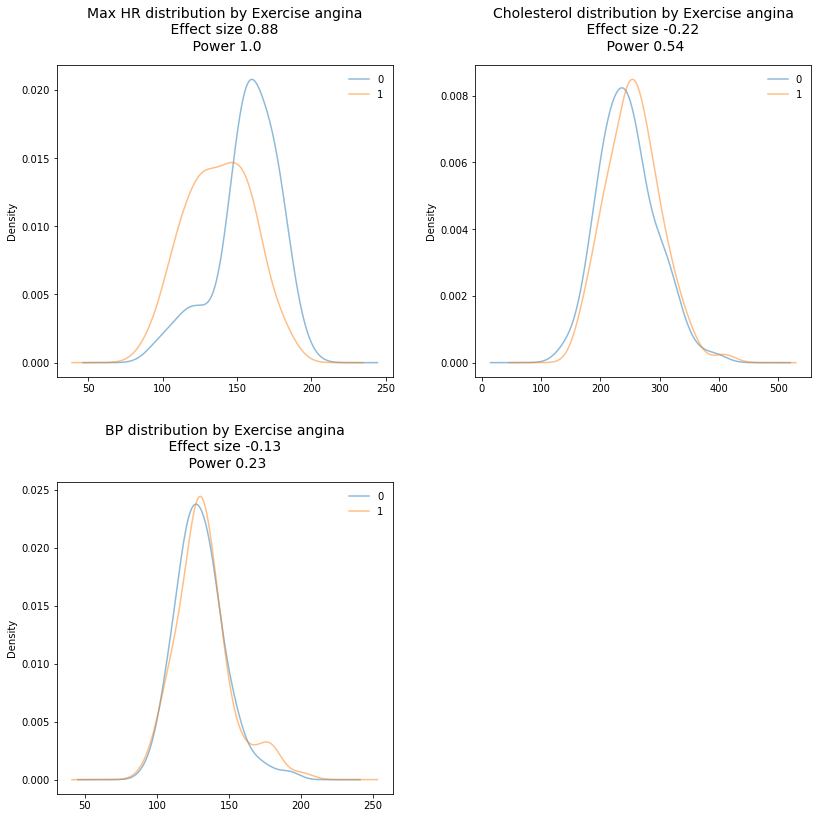

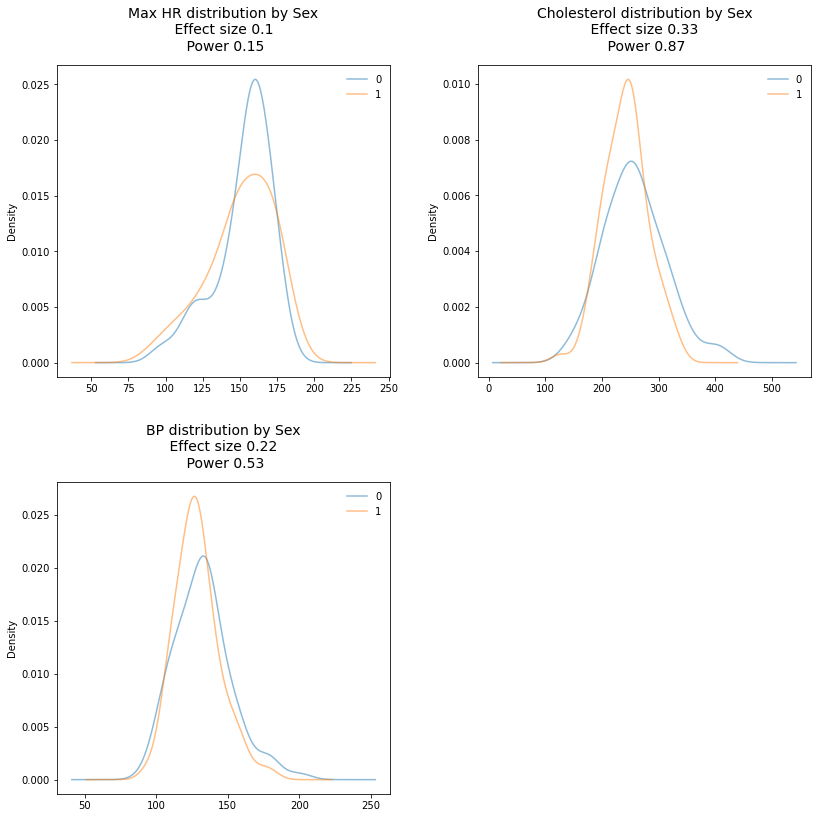

In [60]:
equal_groups_size = True
for group in groups:
    fig = plt.figure(figsize=(12, 12))
    N = len(targets)
    cols = 2
    rows = int(math.ceil(N / cols))
    gs = gridspec.GridSpec(rows, cols)
    
    temp_sample = sample_data
    if equal_groups_size:
        temp_sample = sample_data.groupby(group).sample(n=sample_data.groupby(group).size().min(), random_state=1)

    for j, target in enumerate(targets):
        esv = effect_size(temp_sample.groupby(group), target)
        power_analysis = TTestIndPower()
        power = power_analysis.power(effect_size=esv, nobs1=len(temp_sample), alpha=alpha)

        power = round(power, 2)
        title = f'{target} distribution by {group}\n Effect size {esv} \n Power {power}'
        ax = fig.add_subplot(gs[j])
        group_kde(temp_sample, target, group, title=title, ax=ax)
        
        

    fig.tight_layout(pad=3)
    plt.show()

**Above here we plotted some graphs with their value of effect size and power. We can notice that especially for 'Max HR' there are differences for whom have or not an heart disease or another example is the different value of 'Max HR' for male and female.**
**It would appear that 'Max HR' is an indicator to find some rilevant considerations.**

#One way ANOVA

<Axes: title={'center': 'Max HR'}, xlabel='Heart Disease'>

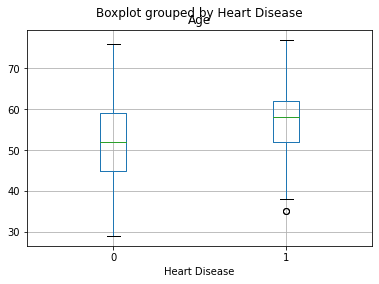

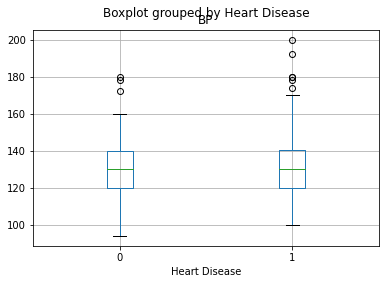

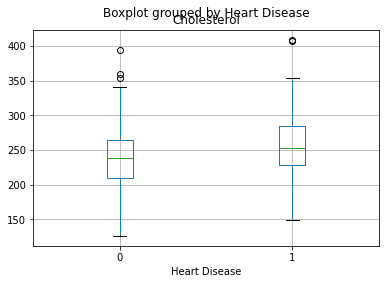

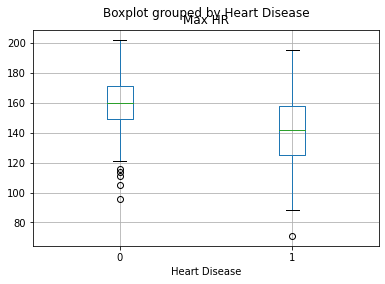

In [61]:
data.boxplot('Age',by = 'Heart Disease')
data.boxplot('BP',by = 'Heart Disease')
data.boxplot('Cholesterol',by = 'Heart Disease')
data.boxplot('Max HR',by = 'Heart Disease')

<Axes: title={'center': 'Max HR'}, xlabel='Sex'>

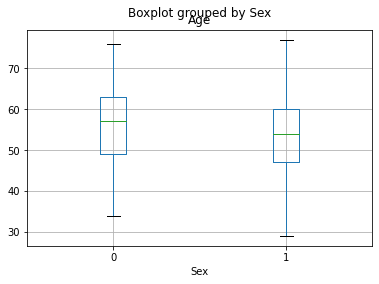

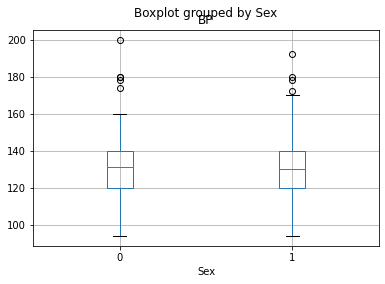

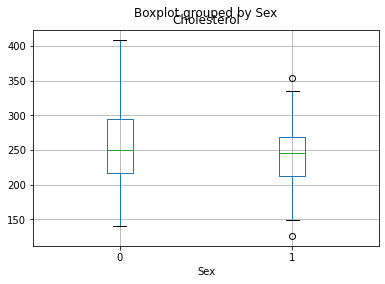

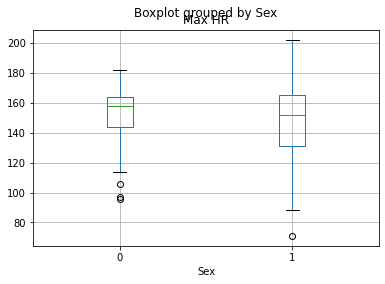

In [62]:
data.boxplot('Age',by = 'Sex')
data.boxplot('BP',by = 'Sex')
data.boxplot('Cholesterol',by = 'Sex')
data.boxplot('Max HR',by = 'Sex')

**We compared our numerical values with 2 categorical values like 'Heart Disease' and 'Sex' to show whether there is variance between them. We could conclude that in 'Heart Disease' seems we have a difference in 'Max HR', in particular, those who have heart disease have a low value in max hr, while in 'Sex' seems we don't have a significative variance.
Now we can use the ANOVA test for confirming or not our hypotheses.**

In [63]:
P_value=st.f_oneway(data['Max HR'],data['Heart Disease'])
print(P_value)

F_onewayResult(statistic=11785.172470846494, pvalue=0.0)


In [64]:
P_value=st.f_oneway(data['Max HR'],data['Sex'])
print(P_value)

F_onewayResult(statistic=11749.002757683162, pvalue=0.0)


**There are a significative differences between 'Max HR' and who have heart disease or not also between different 'Sex'.**

#Non parametric test

**After analyzed the metric scale columns with 'Heart Disease' we can shift our analysis with categorials columns. In particular we are going to use KRUSKAL-WALLIS test for figure out whether we have difference between who have heart disease or not respect a categorial variable.**

In [77]:
target = 'Heart Disease'
categorical_features = [x for x in categorical if x != target]
arr = []
for c in categorical_features:
    groups = sample_data.groupby(c)
    arg = [x[target].values for k, x in groups]
    kruskal_result = st.kruskal(*arg)
    pvalue = round(kruskal_result[1], 3)
    arr.append({
        'group': c,
        'statistic': round(kruskal_result[0], 3),
        'pvalue': pvalue,
        'hypothesis': 'H1' if pvalue < alpha else 'H0'
    })
kruskal_results = pd.DataFrame(arr)
display(kruskal_results)

,group,statistic,pvalue,hypothesis
0,Sex,23.844,0.000,H1
1,Chest pain type,68.334,0.000,H1
2,FBS over 120,0.072,0.789,H0
3,EKG results,8.770,0.003,H1
4,Exercise angina,47.294,0.000,H1
5,Slope of ST,40.221,0.000,H1
6,Number of vessels fluro,62.630,0.000,H1
7,Thallium,74.293,0.000,H1


**This table says there isn't a difference with 'FBS over 120', in the other cases we have differences.**

**Now we are using a MANN-WHITNEY test.**

In [78]:
targets = ['Max HR']
arr = []
for c in categorical:
    groups = sample_data.groupby(c)
    for target in targets:
        arg = [x[target].values for k, x in groups]
        if len(arg) != 2: continue
        mannwhitneyu_result = st.mannwhitneyu(*arg)
        pvalue = round(mannwhitneyu_result[1], 3)
        arr.append({
            'group': c,
            'target': target,
            'statistic': round(mannwhitneyu_result[0], 3),
            'pvalue': pvalue,
            'hypothesis': 'H1' if pvalue < alpha else 'H0'
        })
mannwhitneyu_results = pd.DataFrame(arr)
display(mannwhitneyu_results)

,group,target,statistic,pvalue,hypothesis
0,Sex,Max HR,8850.0,0.138,H0
1,FBS over 120,Max HR,4619.0,0.968,H0
2,EKG results,Max HR,10190.5,0.092,H0
3,Exercise angina,Max HR,11827.0,0.000,H1
4,Heart Disease,Max HR,13247.0,0.000,H1


**We can conclude that there are differences between 'Max HR' with 'Exercise angine' and 'Heart Disease' (as we said before).**

#Correlation

**Correlation analysis is a statistical technique that shows how variables are related. We will take two type of correlation:**
* **Pearson**
* **Spearman**

In [79]:
def pearson_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 3)
    return pvalues

def spearman_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(spearmanr(tmp[r], tmp[c])[1], 3)
    return pvalues

**Pearson correlation for normal columns.**

<Axes: >

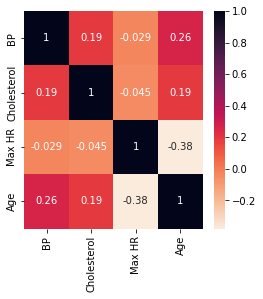

In [80]:
normal_columns = ['BP', 'Cholesterol', 'Max HR', 'Age']

corr = sample_data[normal_columns].corr()
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="rocket_r", annot=True, ax=ax)

**Spearman correlation for categorical or no normal columns.**

<Axes: >

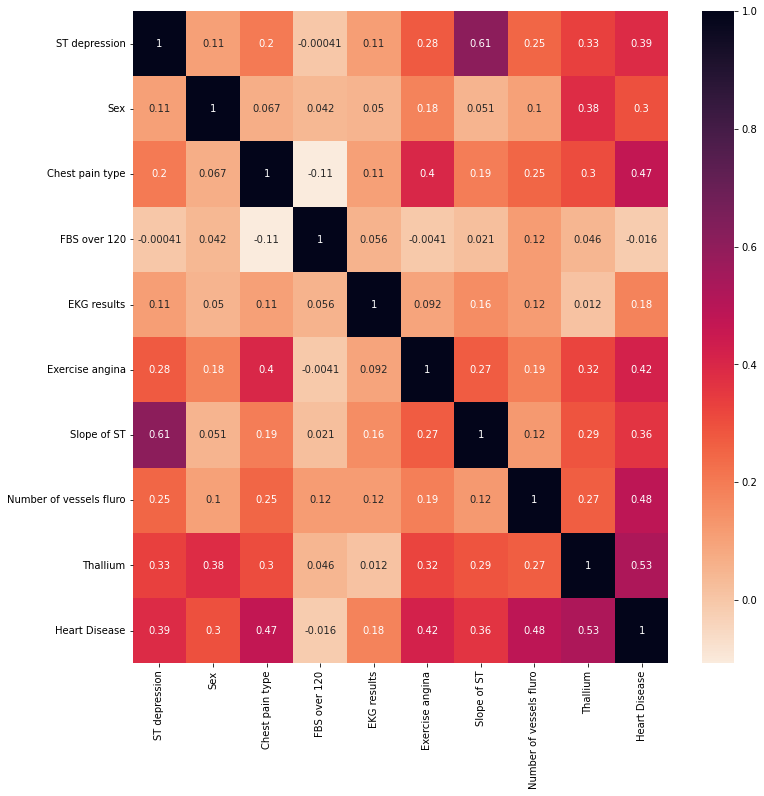

In [81]:
no_normal_columns = ['ST depression'] + categorical

corr = sample_data[no_normal_columns].corr(method="spearman")
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="rocket_r", annot=True, ax=ax)

**Normal with no Normal and Categorical columns.**

**Spearman**

<Axes: >

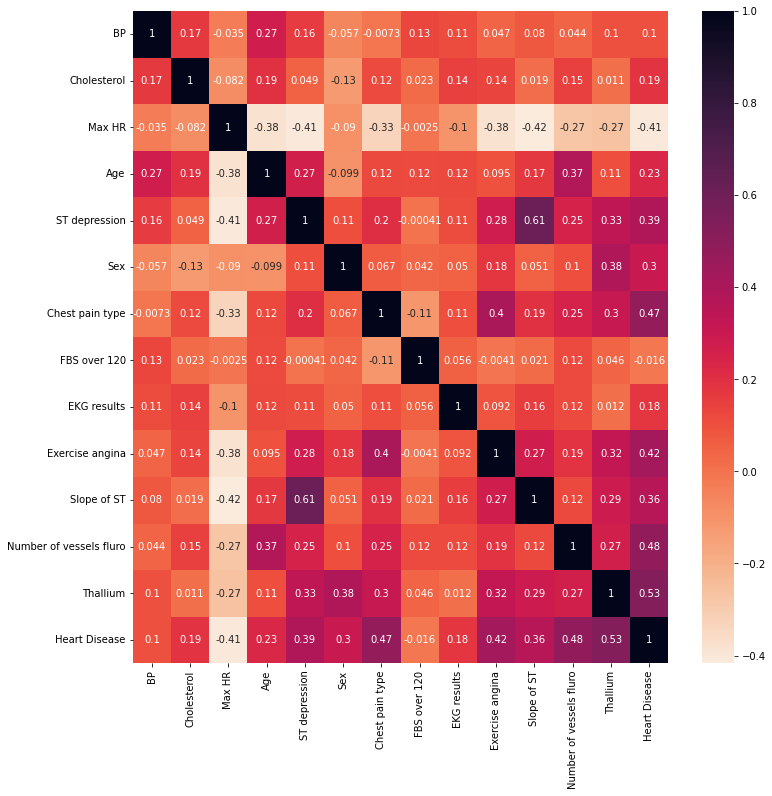

In [82]:
all_columns = normal_columns + no_normal_columns

corr = sample_data[all_columns].corr(method="spearman")

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index, cmap="rocket_r", annot=True, ax=ax)

**Pearson**

<Axes: >

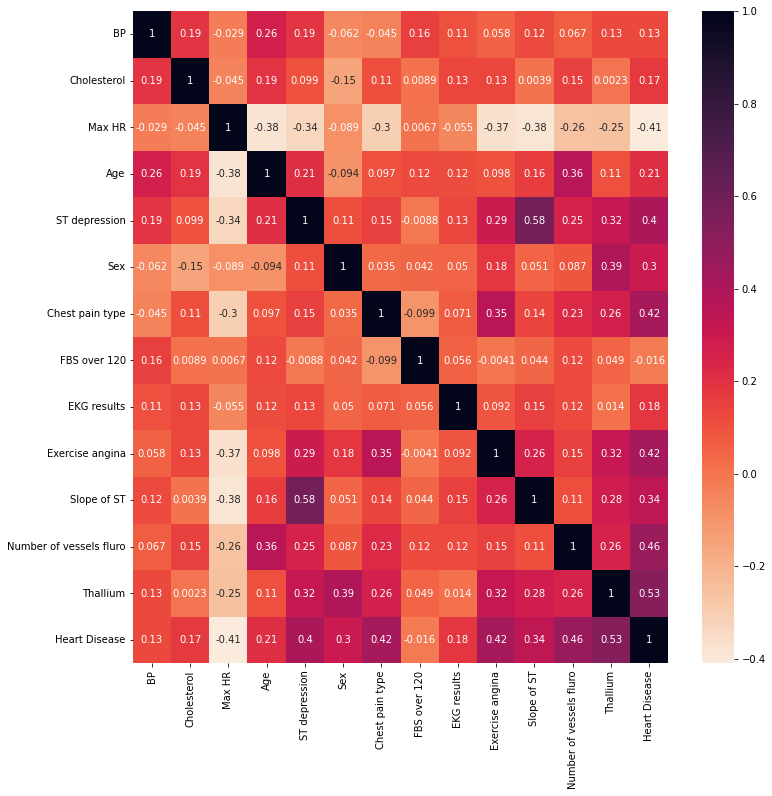

In [83]:
all_columns = normal_columns + no_normal_columns

corr = sample_data[all_columns].corr(method="pearson")

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index, cmap="rocket_r", annot=True, ax=ax)

**We have plotted eight correlation tables. Now we are going to explain in few strings all the tables for understanding the final conclusions.**

**We have four scripts:**

* **Pearson correlation for normal columns.**
* **Spearman correlation for categorial and no normal columns**
* **Spearman correlation for all columns.**
* **Pearson correlation for all columns.**

**We can conclude that:**

* **'Age' and 'BP' seem linearly correlated.**
* **'Slope of ST' with 'ST depression' seem linearly correlated.**
 **With all columns we probability have a correlation between:**
* **'Heart Disease' and 'Thallium'**
* **'Heart Disease' and 'Number of vessels fluro'**
* **'Heart Disease' and 'Chest pain type'**


**These last correlations are positive and are confirmed both by Pearson and Spearman.**

**Now we use a scatter plot to confirm our analysis.**

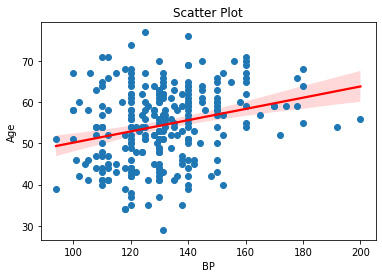

In [84]:
sns.regplot(x='BP', y='Age', data=data,scatter=False, color='red')
plt.scatter(x=data['BP'], y=data['Age'])
plt.xlabel('BP')
plt.ylabel('Age')
plt.title('Scatter Plot')
plt.show()

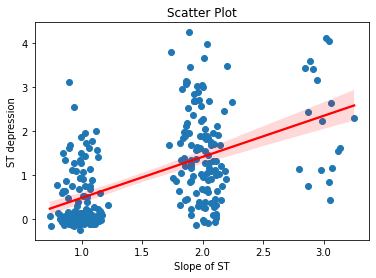

In [85]:
data["Jitter Slope of ST"] = data["Slope of ST"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
data["Jitter ST depression"] = data["ST depression"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
x=data["Jitter Slope of ST"]
y=data["Jitter ST depression"]
plt.scatter(x, y)
sns.regplot(x="Jitter Slope of ST", y="Jitter ST depression", data=data, scatter=False, color='red')
plt.xlabel('Slope of ST')
plt.ylabel('ST depression')
plt.title('Scatter Plot')
plt.show()

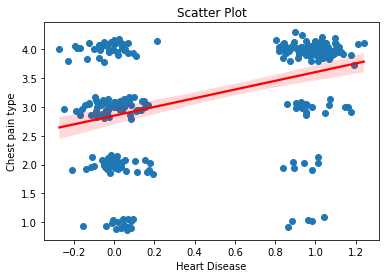

In [86]:
data["Jitter Heart Disease"] = data["Heart Disease"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
x=data["Jitter Heart Disease"]
data["Jitter Chest pain type"] = data["Chest pain type"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
y=data["Jitter Chest pain type"]
plt.scatter(x, y)
sns.regplot(x="Jitter Heart Disease", y="Jitter Chest pain type", data=data, scatter=False, color='red')
plt.xlabel('Heart Disease')
plt.ylabel('Chest pain type')
plt.title('Scatter Plot')
plt.show()

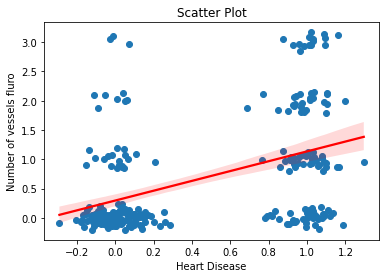

In [87]:
data["Jitter Heart Disease"] = data["Heart Disease"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
x=data["Jitter Heart Disease"]
data["Jitter Number of vessels fluro"] = data["Number of vessels fluro"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
y=data["Jitter Number of vessels fluro"]
plt.scatter(x, y)
sns.regplot(x="Jitter Heart Disease", y="Jitter Number of vessels fluro", data=data, scatter=False, color='red')
plt.xlabel('Heart Disease')
plt.ylabel('Number of vessels fluro')
plt.title('Scatter Plot')
plt.show()

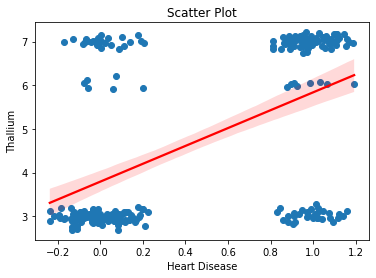

In [88]:
data["Jitter Heart Disease"] = data["Heart Disease"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
x=data["Jitter Heart Disease"]
data["Jitter Thallium"] = data["Thallium"].apply( lambda x: x + np.random.normal(loc=0, scale=0.1))
y=data["Jitter Thallium"]
plt.scatter(x, y)
sns.regplot(x="Jitter Heart Disease", y="Jitter Thallium", data=data, scatter=False, color='red')
plt.xlabel('Heart Disease')
plt.ylabel('Thallium')
plt.title('Scatter Plot')
plt.show()

**Being that some variables are categorial we need to convert them with a random transformation, after that, we showed all scatter plots that confirm the correlations.**

#Logisitc regression

In [89]:
spearman_features = [
    'Max HR',
    'Age',
    'ST depression',
    'Sex',
    'Chest pain type',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]

pearson_features = [
    'Age',
    'ST depression',
    'Sex',
    'Chest pain type',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]

target = 'Heart Disease'

features = [spearman_features, pearson_features][1]

In [90]:
OneHotEncode = False
sample_data['Age'] = sample_data['Age'].astype(float)
sample_data['Number of vessels fluro'] = sample_data['Number of vessels fluro'].astype(float)


data = sample_data.copy()
data = data[features + [target]]

if OneHotEncode:
    categorical = data.select_dtypes(include=['category','int']).columns
    categorical = [c for c in categorical if c != target and len(data[c].unique()) > 2]
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(data[categorical])
    transformed = encoder.transform(data[categorical])
    ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out(categorical))
    data = pd.concat([data, ohe_df], axis=1).drop(categorical, axis=1)

In [91]:
data.columns

Index(['Age', 'ST depression', 'Sex', 'Chest pain type', 'Exercise angina',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [92]:
X, y = data.loc[:, data.columns != target], data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=180, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

y_train = y_train.values
y_test = y_test.values

In [93]:
sm_x_train = sm.add_constant(X_train)
logit = sm.Logit(y_train, sm_x_train)

logit = logit.fit()

sm_x_test = sm.add_constant(X_test)
y_hat = np.round(logit.predict(sm_x_test)).astype(int)

cm = confusion_matrix(y_test, y_hat)
print('Balanced test accuracy = ', balanced_accuracy_score(y_test, y_hat, adjusted=True))
print('Test accuracy = ', accuracy_score(y_test, y_hat))

roc_auc_value = roc_auc_score(y_test, y_hat)
print('Test Roc Auc score = ', roc_auc_value)

Optimization terminated successfully.
         Current function value: 0.372195
         Iterations 7
Balanced test accuracy =  0.6707075705096486
Test accuracy =  0.8388888888888889
Test Roc Auc score =  0.8353537852548244


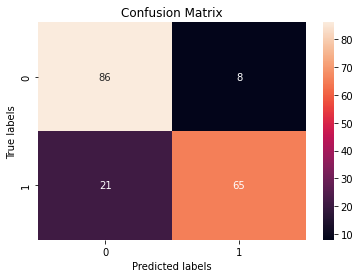

In [94]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [95]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   90
Model:                          Logit   Df Residuals:                       81
Method:                           MLE   Df Model:                            8
Date:                Wed, 29 Mar 2023   Pseudo R-squ.:                  0.4386
Time:                        01:36:13   Log-Likelihood:                -33.498
converged:                       True   LL-Null:                       -59.667
Covariance Type:            nonrobust   LLR p-value:                 1.448e-08
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6385      0.322     -1.980      0.048      -1.271      -0.006
Age                        -0.0653      0.334     -0.195      0.845      -0.720       0.590


**Here we xreated our regression logistic model using skilearn library. The reading off whole code is left to the reader, now we comment the results of model.**

* **Current function value: 0.3722: This value represents the loss function of the model on the last batch of data during training. A low value indicates that the model can fit the training data well.**

* **Iterations 7: This value indicates the number of iterations required to optimize the model.**

* **Balanced test accuracy = 0.6707: This value represents the balanced accuracy of the model on the test data.**

* **Test accuracy = 0.8389: This value represents the accuracy of the model on the test data. The accuracy is the percentage of correct predictions of the model.**

* **Test Roc Auc score = 0.8354: This value represents the area under the ROC curve (ROC AUC) of the model on the test data. The ROC curve is a curve representing the relationship between the true positive rate and false positive rate of the model over a range of decision thresholds.**



**Balanced test accuracy = 0.6707: This value represents the balanced accuracy of the model on the test data.**


In [96]:
def heart_disease_prediction(age,st_depression,sex,chest_pain_type,exercise_angina,slope_of_st,number_of_vessels_fluro,thallium):

  const = -0.6385
  coef_age = -0.0653
  coef_sex = 0.1840
  coef_st_depression = 0.6719
  coef_Chest_pain_type = 0.6327
  coef_Exercise_angina = 0.3969
  coef_Slope_of_ST = 0.2739
  coef_Number_of_vessels_fluro = 1.2652
  coef_thallium = 0.4683

  num = np.exp(const+age*coef_age+st_depression*coef_st_depression+sex*coef_sex+chest_pain_type*coef_Chest_pain_type+exercise_angina*coef_Exercise_angina+slope_of_st*coef_Slope_of_ST
               +number_of_vessels_fluro*coef_Number_of_vessels_fluro+thallium*coef_thallium)
  den = 1+num



  prob = (num/den)*100
  return print(f"Probability of Heart Disease: {prob}%")

**Let's try to make some predictions now.**

**First case.**

In [97]:
heart_disease_prediction(60,1.2,0,1,1,1,2,1)

Probability of Heart Disease: 63.45948440220419%


**Second case.**

In [98]:
heart_disease_prediction(50,1.2,1,4,1,1,1,1)

Probability of Heart Disease: 88.30752652480426%


# Conclusions

**We have completed the logistic regression algorithm for predicting a heart disease.**

**We came to predict the outcome after several steps, one equally important to the other.**

**In *EDA* phase we used some basic python function for discover nan or wierds values like '44' for 'Chest pain type'. Additionally we usurped various plots for understanding our columns as box plot or chart plot. In final part we displayed a crosstab for figure out eventually possible correlations.**

**In *Check normality distribution* we first studied the normality of the continuous columns through histograms and QQ plots where the column 'ST depression' was found to be not normally distributed. In addition, we created a small function that was going to study the distribution of each categorical column over some continuous columns without finding major ambiguities. Finally, we used kurtosis, skewness, and z score to find with a statistical tools which columns were not normal.**

**In *Parametric test, effect size and power* we tested the parametric t test on the values of 'Max HR' for different ages with the reference value taken from the internet. In addition, we used tests such as power and effect size to detect any significant differences in the groups.**

**In *One way ANOVA* and *Non parametric test* we used other statistic tools for finding some significative differences and the main result was we have for 'Max HR' and 'Exercise angina' differences with 'Heart Disease'.**

**In *Correlation* we first used Spearman's correlation and then Pearson's correlation to see from both two the results. It can be seen that there are several positive correlations where the greatest correlation occurs between 'ST depression' and 'Slope of ST' also 'Heart Disease' is also correlated with many variables.**

**In *Logistic regression* the aim was to generate the best model based on the previously performed analyses. Above you can find all the features of the model which would seem to be well accurate. Now we will try to predict some results based on the coefficients that were calculated.**


**CASE 1**:

* Age = 60

* ST Depression = 1.2

* Sex = Female

* Chest pain type = 1

* Exercise angina = 1

* Slope of ST = 1

* Number of vessels fluro = 2

* Thallium = 1

**Probability of Heart Disease: 63.46%**

**CASE 2**:

* Age = 50

* ST Depression = 1.2

* Sex = Male

* Chest pain type = 4

* Exercise angina = 1

* Slope of ST = 1

* Number of vessels fluro = 1

* Thallium = 1

**Probability of Heart Disease: 88.31%**